# Quét tài liệu (tách nền):

In [1]:
import cv2
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import imutils

# import the necessary packages
from imutils.perspective import four_point_transform
from skimage.filters import threshold_local

from imutils import contours
%matplotlib inline

--- 
## I. Viết hàm

In [2]:
def Document_Scanning(file_name):
    
    # Đọc file ảnh và điều chỉnh kích thước (giúp chương trình chạy nhanh hơn)
    image = cv2.imread(file_name)
    ratio = image.shape[0] / 500.0
    orig = image.copy()
    image = imutils.resize(image, height = 500)
    
    
    # Chuyển sang ảnh gray, làm trơn ảnh bằng phương pháp Gaussian
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    #Xác định biên cạnh bằng phương pháp Canny
    edged = cv2.Canny(gray, 75, 200)

    # Tìm đường viền của tài liệu:
    # giả định rằng các đường bao lớn nhất trong hình ảnh (chính xác bốn viền) là mảnh giấy đang xét.
    tmp = cv2.findContours(edged,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
    cnts = tmp[0] if len(tmp) == 2 else tmp[1]

    # phải chắc rằng có nhiều hơn 1 contour được tìm thấy
    if len(cnts) > 0:
    # săp xếp các contour tìm được
    # theo thứ tự lớn tới bé
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

    #Xét trong các contour
    for c in cnts:
        # Ước lượng đường viền
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # nếu approximated contour bằng 4 điểm
        # thì nó chính là 4 góc của mảnh giấy
        if len(approx) == 4:
            docCnt = approx
            break

    # Đóng khung,  Màu khung: (0, 255, 0)
    cv2.drawContours(image, [docCnt], -1, (0, 255, 0), 2)
    
    # 
    warped = four_point_transform(orig, docCnt.reshape(4, 2) * ratio)
    
    # chuyển đổi hình ảnh bị cong vênh sang thang độ xám, sau đó định ngưỡng nó 
    # để tạo hiệu ứng đen trắng (như tài liệu)
    warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    T = threshold_local(warped, 11, offset = 10, method = "gaussian")
    warped = (warped > T).astype("uint8") * 255
    
    return warped


---

## II. Chạy và hiển thị kết quả:

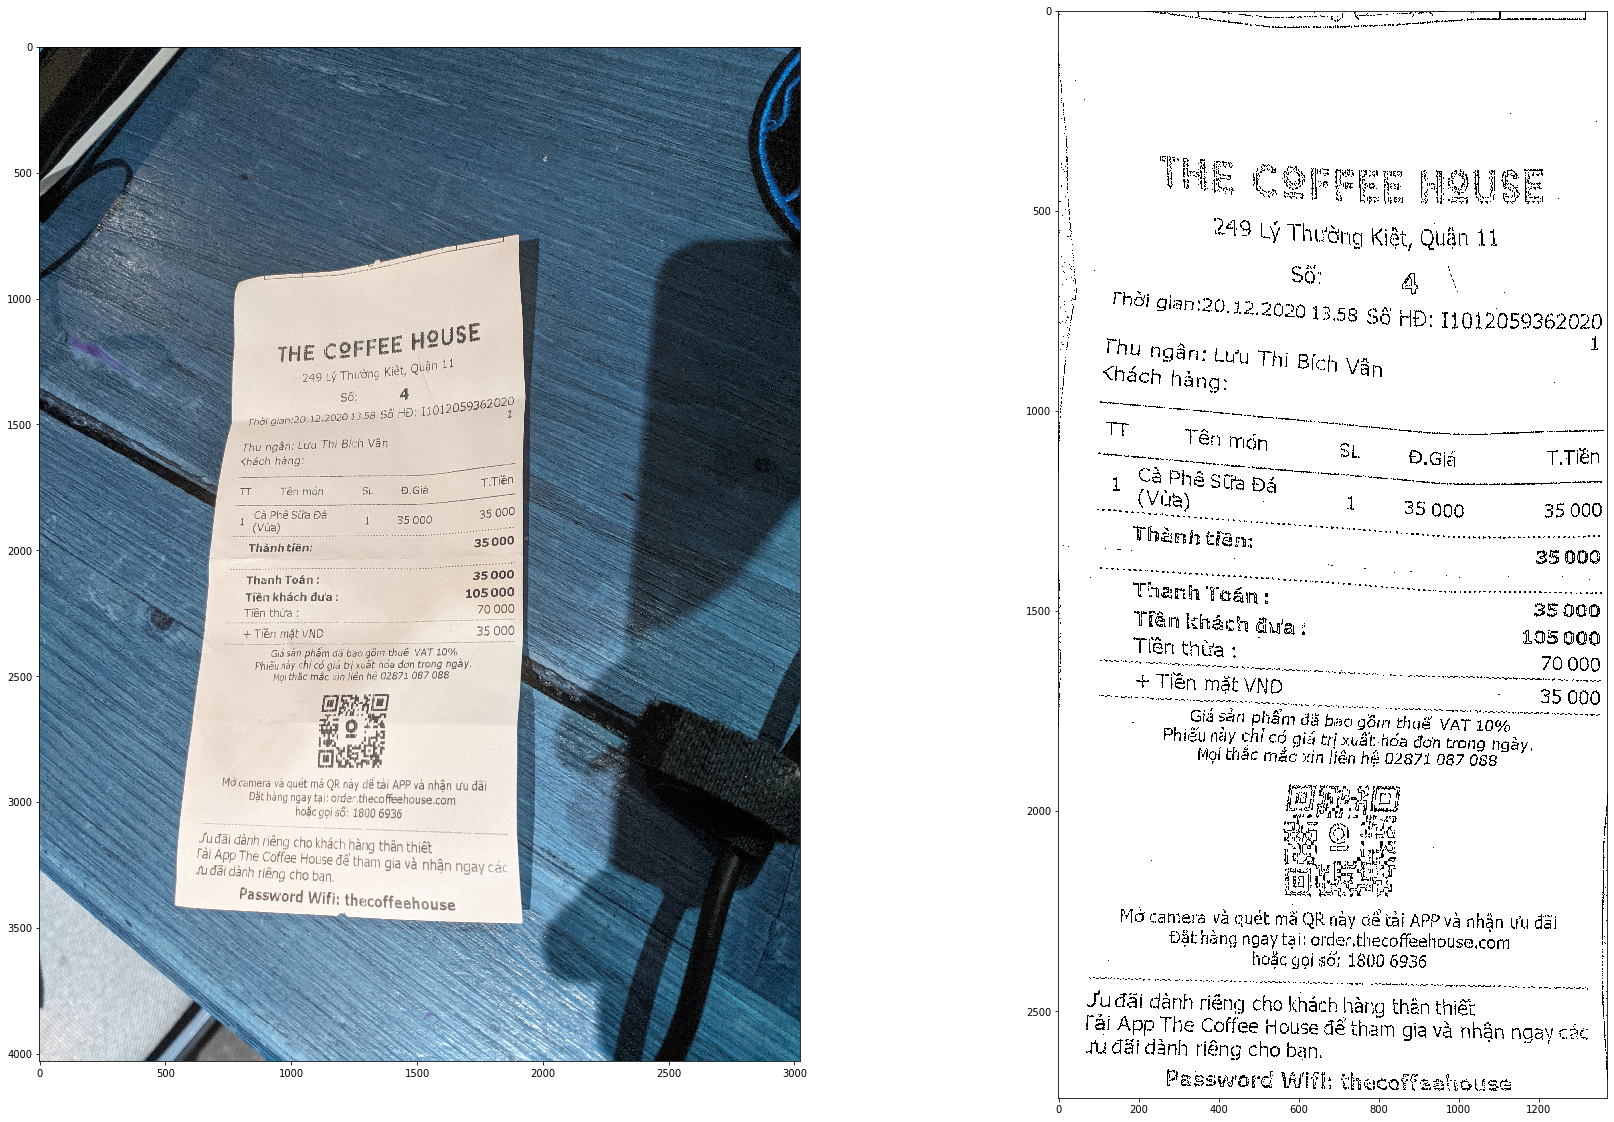

In [3]:
#Hiển thị kết quả
#Đọc ảnh input
file_name = 'test_2.jpg'
image_input = cv2.imread(file_name)
plt.rcParams["figure.figsize"] = (30,20)

#Tạo khung hiển thị 1 hàng, 2 cột
f, axarr = plt.subplots(1,2) 

#Gán ảnh output
image_output = cv2.cvtColor(Document_Scanning(file_name), cv2.COLOR_GRAY2BGR)

#Hiển thị
plt.imshow(image_output, interpolation='nearest')
axarr[0].imshow(image_input)
axarr[1].imshow(image_output)

# cv2.imshow('image window', Document_Scanning('test_4.jpg'))
# cv2.waitKey(0)

---

## III. Tài liệu tham khảo:

Link tham khảo: 

- [Link 1](https://stackoverflow.com/questions/55513477/how-to-find-the-document-edges-in-various-coloured-backgrounds-using-opencv-pyth)

- [Link 2](https://www.pyimagesearch.com/2014/09/01/build-kick-ass-mobile-document-scanner-just-5-minutes/)

- [Link 3](https://congdongopencv.blogspot.com/2017/12/su-dung-xu-ly-anh-thu-vien-opencv-viet.html)

KeyWord: How to find the document edges in various coloured backgrounds using opencv python? [Document Scanning in various backgrounds]